## Imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pypsa
import matplotlib.patches as mpatches

"""
data_path = "C:/Users/xenia/OneDrive/Desktop/Uni/NTNU/Thesis/Data/"
save_path = "C:/Users/xenia/Desktop/Bolivia/Figures/"
val_path = "C:/Users/xenia/Desktop/Bolivia/Figures/Validation/"
home = "C:/Users/xenia/Desktop/Bolivia/"
"""

network = 'C:/Users/noraky/Documents/Test_4/pypsa-earth/networks/elec_s_27_ec_lcopt_Co2L-1H.nc'
n = pypsa.Network(network)

## Colors

In [5]:
red1 = '#891D2D'
red2 = '#BA3B31'
orange = '#F58221'
yellow = '#FCAF19'
brown = '#440A15'
purple1 = '#3B1053'
purple2 = '#76518E'
purple3 = '#B69DC7'
teal1 = '#032838'
teal2 = '#154655'
teal3 = '#527D77'
teal4 = '#8DB5AF'
green1 = '#294839'
green2 = '#6E966E'
green3 = '#A3BDA3'
beige1 = '#927F48'
beige2 = '#A89677'
beige3 = '#D2CDAD'

from matplotlib.colors import ListedColormap




plt.rcParams['font.size'] = 18
zones = ['Northern', 'Oriental', 'Central', 'Southern']
zone_colors=[teal1,teal4,teal2,teal3]

# Define your custom colormap
cmap_zones = ListedColormap(zone_colors)

## Buses

In [2]:
# Buses in case 2 

Bus_0 = (-19.670683,-65.478983)	# Southern 
Bus_1 = (-16.246122,-67.886833) # Northern 
Bus_2 = (-17.444333,-63.727550) # Oriental 
Bus_3 = (-17.547787,-66.149025) # Central

## Power Production & Demand


### Read in data

In [3]:
# Power production and consumption by sector
production_sectors = pd.read_excel(data_path + "electricity_2006-2021.xlsx", nrows=14).transpose()
# Set the first row as the column names
#production_sectors.set_axis(production_sectors.iloc[0], axis=1, inplace=True)
production_sectors = production_sectors[1:]  # Remove the first row as it is now the column names
#display(production_sectors)

# Electrification rates
sheet_index = 1
electrification = pd.read_excel(data_path + "electricity_2006-2021.xlsx", sheet_name=sheet_index,nrows = 3, )
#display(electrification)

# Power production by source
sheet_index = 1
start_row = 4
end_row = 9
production_sources = pd.read_excel(data_path + "electricity_2006-2021.xlsx", sheet_name=sheet_index, skiprows=range(1, start_row), nrows=(end_row - start_row + 1) ).transpose()
#display(production_sources)
production_sources= production_sources.iloc[2:,1:]
new_column_names = {
    1: 'Hydro',
    2: 'Renewable thermal',
    3: 'Non-renewable thermal',
    4 : 'Wind',
    5 : 'Solar'
}

# Rename the columns
production_sources = production_sources.rename(columns=new_column_names)
#display(production_sources)
renewable_production = production_sources[['Hydro','Renewable thermal','Wind','Solar']].sum(axis=1)
#display(renewable_production)
# installed generation by source
sheet_index = 1
start_row = 10
end_row = 15

# Generation by source in percent
production_sources_per = pd.read_excel(data_path + "electricity_2006-2021.xlsx", sheet_name=2, index_col=0 ).transpose()
#display(production_sources_per)


# Installed capacity
capacity = pd.read_excel(data_path + "electricity_2006-2021.xlsx", sheet_name=sheet_index, skiprows=range(1, start_row), nrows=(end_row - start_row + 1) ).transpose()
capacity= capacity.iloc[2:].rename(columns=new_column_names)

#display(capacity)

### Power consumption by sector

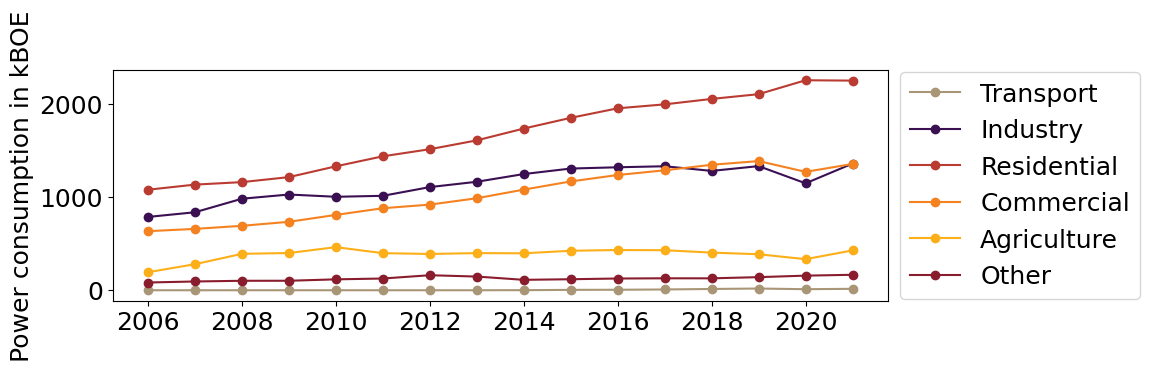

In [5]:
column_colors = [beige2,purple1,red2,orange,yellow, red1]


production_sectors.iloc[:,[6,7,8,9,10,11]].plot(kind='line', marker='o', color=column_colors, figsize=(10, 3))

# Adding labels and title
plt.ylabel('Power consumption in kBOE')
column_names = ['Transport', 'Industry','Residential','Commercial','Agriculture','Other']  # Example column names, adjust as needed
plt.legend(column_names, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(save_path+'sectoral_power_consumption_timeline.pdf', dpi=300, format='pdf', bbox_inches='tight')
# Displaying the plot
plt.show()

### Power mix

In [5]:
production_sources

,Hydro,Renewable thermal,Non-renewable thermal,Wind,Solar
2006,2131,0,2850,0,0
2007,2294,14,3107,0,0
2008,2281,39,3590,0,0
2009,2265,60,3888,0,0
2010,2152,58,4439,0,0
2011,2346,131,4742,0,0
2012,2352,145,5163,0,0
2013,2535,136,5392,0,0
2014,2251,126,6175,8,0
2015,2463,170,6471,11,5


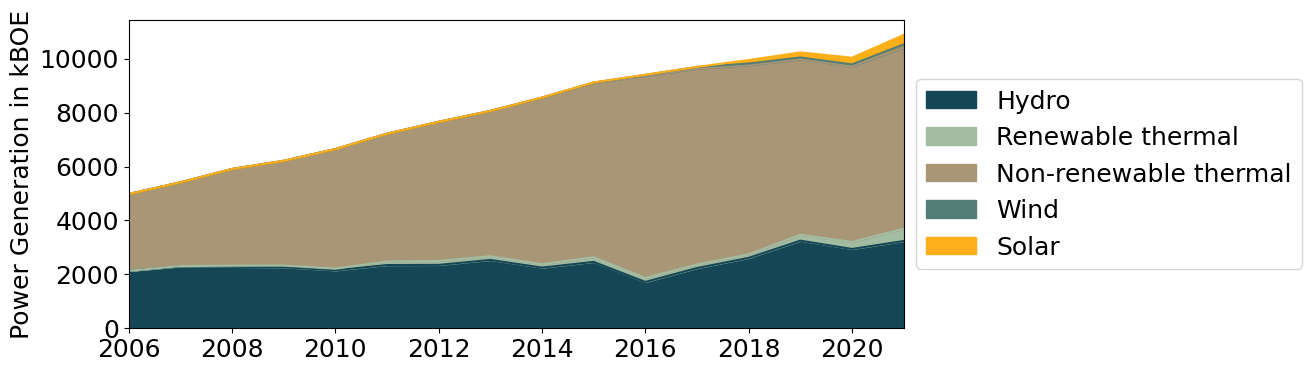

In [4]:
colors = [teal2,green3,beige2,teal3,yellow]
production_sources.plot.area(stacked=True, color=colors,figsize=(10, 4))
  # Example column names, adjust as needed
plt.ylabel('Power Generation in kBOE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0,15)
plt.savefig(save_path+'development_capacity.pdf', dpi=300, format='pdf', bbox_inches='tight')

### Power mix 2021 - REDO!


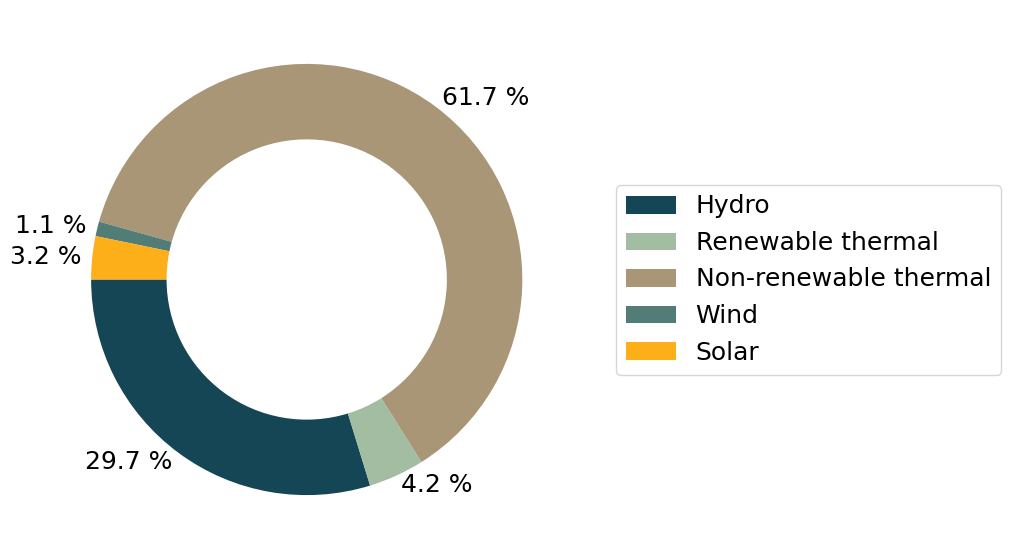

In [7]:
# Power mix in 2021
plt.rcParams['font.size'] = 18
row_index = 15  # Example row index, adjust as needed

# Extract the row as a Series
row = production_sources.iloc[row_index]
labels = ['29.7 %', '4.2 %', '61.7 %', '1.1 %', '3.2 %']
# Plot the row as a donut chart with labels placed further away
plt.figure(figsize=(7, 7))
plt.pie(row, labels=labels, wedgeprops={'width': 0.35}, startangle=180, labeldistance=1.05,colors = colors)

plt.legend(['Hydro','Renewable thermal','Non-renewable thermal','Wind','Solar'],loc='center left', bbox_to_anchor=(1.05, 0.5))

# Adding a title

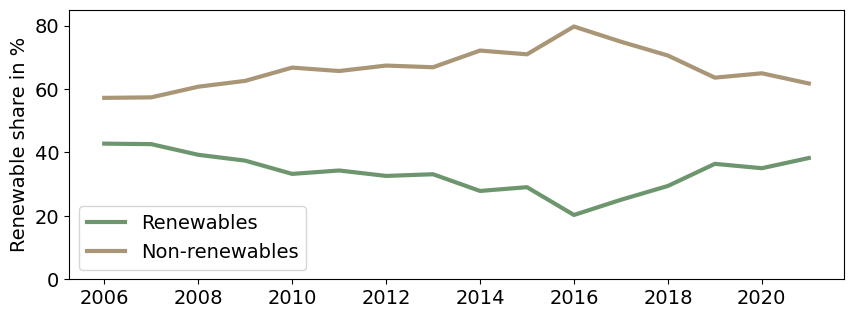

In [7]:
plt.rcParams['font.size'] = 14

(production_sources_per['Renewables']*100).plot(color=green2, linewidth = 3, figsize=(10,3.5), label = 'Renewables')
(production_sources_per['Non-renewables']*100).plot(color=beige2, linewidth = 3, figsize=(10,3.5), label = "Non-renewables")

plt.legend()
plt.ylabel("Renewable share in %")
plt.ylim(0,85)
plt.savefig(save_path+'development_RES_share.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

### Installed capacity - REDO!!

Text(0, 0.5, 'Installed capacity in MW')

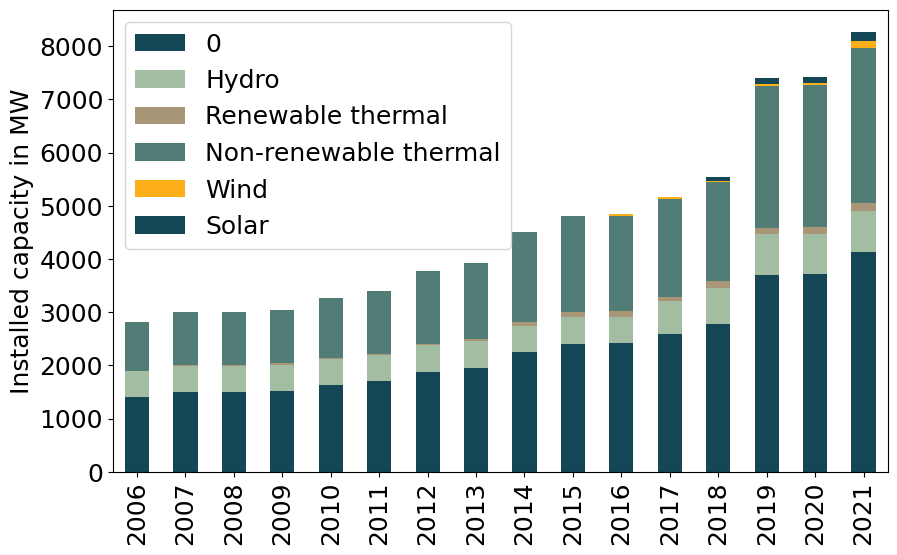

In [8]:
plt.rcParams['font.size'] = 18
capacity.plot.bar(stacked=True,color=colors,figsize=(10,6))
plt.ylabel('Installed capacity in MW')


### Comparison capacity

In [21]:
# Custom powerplants ------------------------------------------------------------------
custom_pp = pd.read_csv("C:/Users/xenia/Desktop/Bolivia/pypsa-earth/data/custom_powerplants_phase_out.csv",delimiter=';')
#print(custom_pp)
custom_capacities = custom_pp.groupby(["Fueltype"]).sum()["Capacity"]
display(custom_capacities)
##display(custom_capacities.sum())
custom_con = custom_capacities.loc[['CCGT','OCGT','Oil']]
custom_index = ['Non-renewable']
conventional_capacity = pd.Series(custom_capacities.loc[['CCGT','OCGT','Oil']].sum(axis=0), index = custom_index)
#display(conventional_capacity)
#display(custom_con)

custom_capacities = pd.concat([custom_capacities,conventional_capacity])
custom_capacities = custom_capacities[['Bioenergy', 'Solar' , 'Wind', 'hydro', 'Non-renewable']]
new_index_names = {'Bioenergy': 'Biomass',  'hydro' : 'Hydro'}
custom_capacities = custom_capacities.rename(index=new_index_names).sort_index()
custom_capacities = pd.Series(custom_capacities)
#display(custom_capacities)

# Data from CNDC ----------------------------------------------------------------------

# Path to the Excel file
excel_file = "C:/Users/xenia/OneDrive/Desktop/Uni/NTNU/Thesis/Data/electricity_2006-2021.xlsx"

# Read data from a specific worksheet by name
worksheet_name = 'Validation'
df = pd.read_excel(excel_file, sheet_name=worksheet_name)
df.set_index('carrier', inplace=True)
df.index = df.index.str.capitalize()
df_official = df["p_nom"]
new_index_names = {  'Gas' : 'Non-renewable', 'Onshore wind' : 'Wind'}
df_official = df_official.rename(index=new_index_names).sort_index()
#display(df_official)

# Data used by PyPSA -----------------------------------------------------------------------------------
powerplants_data = "C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/resources/powerplants.csv"
available_generators = pd.read_csv(powerplants_data)
installed_capacity_resources = available_generators.groupby(["Country", "Fueltype"])["Capacity"].sum()
capacity_pypsa_fueltype = installed_capacity_resources.groupby(["Fueltype"]).sum()
pypsa_con = capacity_pypsa_fueltype.loc[['CCGT','OCGT','Oil']]
custom_index = ['Non-renewable']
capacity_pypsa_conventional = pd.Series(capacity_pypsa_fueltype.loc[['CCGT','OCGT','Oil']].sum(axis=0), index = custom_index)
capacity_pypsa_fueltype = pd.concat ([capacity_pypsa_fueltype,capacity_pypsa_conventional])
capacity_pypsa_fueltype = capacity_pypsa_fueltype[['Bioenergy', 'Solar' , 'Wind', 'hydro', 'Non-renewable']]
new_index_names = {'Bioenergy': 'Biomass', 'hydro':'Hydro'}
capacity_pypsa_fueltype = capacity_pypsa_fueltype.rename(index=new_index_names).sort_index()
#display(capacity_pypsa_fueltype)
#display(pypsa_con)

# Old "Powerplants.csv" data ----------------------------------------------------------------------
solved_network = 'C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/Validation_results/Validation_2021_case_1_a.nc'
n = pypsa.Network(solved_network)
capacity_pypsa_fueltype_old = n.generators.groupby('carrier').p_nom.sum().drop('load').sort_index()
index = 'Hydro'
hydro_p_nom = n.storage_units.p_nom.sum()
Hydro =  pd.Series(data=hydro_p_nom, index=[index])
#display(capacity_pypsa_fueltype_old)
pypsa_con_old = capacity_pypsa_fueltype_old.loc[['OCGT','oil']]
custom_index = ['Non-renewable']
capacity_pypsa_conventional_old = pd.Series(capacity_pypsa_fueltype_old.loc[['OCGT','oil']].sum(axis=0), index = custom_index)
capacity_pypsa_fueltype_old = pd.concat([capacity_pypsa_fueltype_old,capacity_pypsa_conventional_old])
capacity_pypsa_fueltype_old['ror']=capacity_pypsa_fueltype_old['ror'] + Hydro.values
capacity_pypsa_fueltype_old = capacity_pypsa_fueltype_old.drop(['OCGT','oil'])
new_indices = {'onwind': 'Wind', 'ror': 'Hydro', 'solar': 'Solar'}
capacity_pypsa_fueltype_old = capacity_pypsa_fueltype_old.rename(new_indices).sort_index()
#display(capacity_pypsa_fueltype_old)
#Hydro

# New capacity


year = 2035
solved_network = f'C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/Scenario_A_baseline_results/Baseline_{year}.nc'
n_solve = pypsa.Network(solved_network)
n = n_solve
cap_new = pd.DataFrame(n.generators.p_nom_opt)
cap_new['Carrier'] = cap_new.index.str.split().str[2]

#Group the capacities by the number
grouped = cap_new.groupby('Carrier').sum()
grouped = grouped.drop('load')
custom_index = ['Non-renewable']
new_con = pd.Series(grouped.loc[['OCGT','oil','OCGT']].sum(axis=0), index = custom_index)
display(new_con)

new_indices = {'onwind': 'Wind', 'solar': 'Solar','biomas':'Biomass'}

Fueltype
Bioenergy      65.58
CCGT         1443.99
OCGT          877.28
Oil            31.32
Solar         164.90
Wind          127.34
hydro         732.20
Name: Capacity, dtype: float64

INFO:pypsa.io:Imported network Validation_2021_case_1_a.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units
INFO:pypsa.io:Imported network Baseline_2035.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


Non-renewable   NaN
dtype: float64

In [22]:
capacity_pypsa_fueltype_old

Hydro            397.318381
Non-renewable    948.337394
Solar            119.113323
Wind              25.806506
dtype: float64

3442.6100000000006

3589.7400000000002

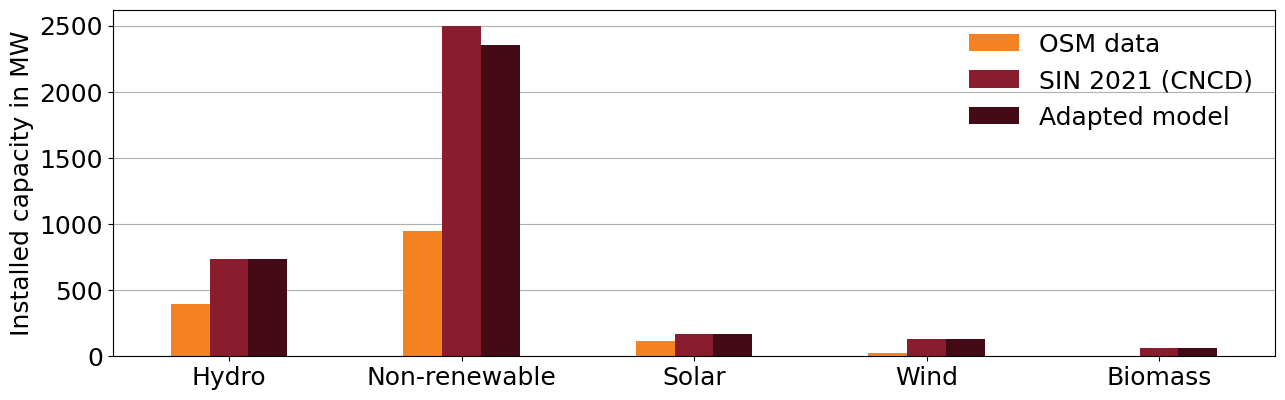

In [28]:

# Create one DataFrame with everything
all = pd.concat([ capacity_pypsa_fueltype_old.rename("OSM data"),df_official.rename("SIN 2021 (CNCD)"),custom_capacities.rename("Adapted model") ], axis=1) #

all.plot.bar( color = [orange,red1, brown],figsize=(15,4.5),zorder=2) #,brown
#df_official.plot.bar(label="Ministry 2021", color = purple1)
plt.ylabel('Installed capacity in MW')
plt.xticks(rotation=0)
plt.legend(frameon=False)
plt.grid(axis='y',zorder=0)
plt.savefig(save_path+'comparison_capacity_CNDC_custom.pdf', dpi=300, format='pdf', bbox_inches='tight')

display(custom_capacities.sum())
display(df_official.sum())


Fueltype
OCGT    False
Name: Capacity, dtype: bool

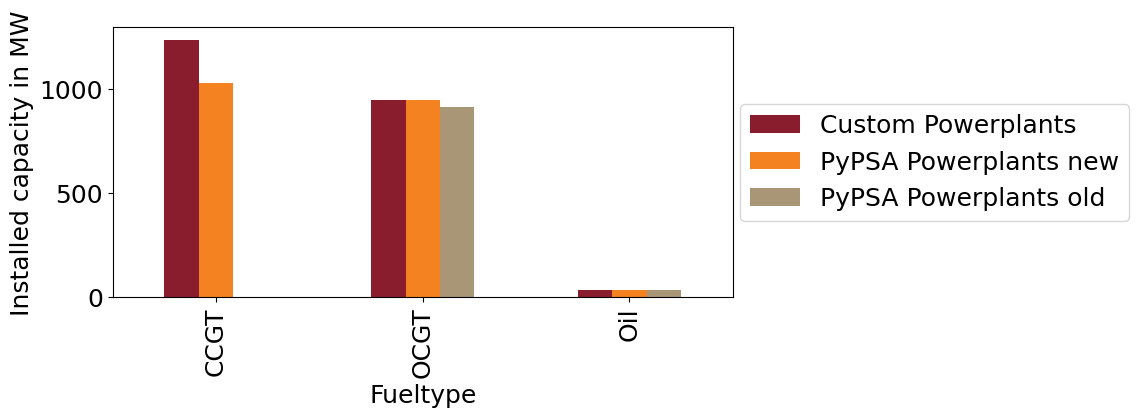

In [12]:
# Conventional capacities

con_all = pd.concat([ custom_con.rename('Custom Powerplants'), pypsa_con.rename('PyPSA Powerplants new'),pypsa_con_old.rename('PyPSA Powerplants old')], axis = 1)

con_all.plot.bar(color=[red1, orange,beige2],figsize=(8,3.5))
plt.legend(loc='center right', bbox_to_anchor=(1.66, 0.5))
plt.ylabel('Installed capacity in MW')

custom_con.loc[['OCGT']] + pypsa_con_old.loc[['OCGT']] == pypsa_con.loc[['OCGT']]

### Nodal capacity

Zone
Oriental    1916.12
Northern     364.18
Southern     635.38
Central      674.59
Name: p_nom, dtype: float64

3590.2700000000004

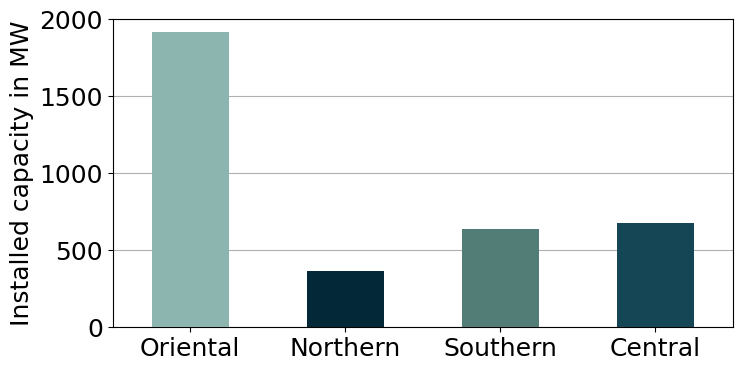

In [101]:
nodal_CNDC = pd.read_excel(data_path +'nodal_capacity_CNDC.xlsx')
nodal_CNDC.groupby('Zone').p_nom.sum()
new_order = ['Oriental', 'Northern', 'Southern', 'Central']
ordered = nodal_CNDC.groupby('Zone').p_nom.sum().reindex(new_order)
#nodal_CNDC.columns
ordered.plot.bar(zorder = 2, color=[teal4,teal1,teal3,teal2],figsize=(8,4))
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,2000)
plt.xticks(rotation = 0)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'nodal_capacity_CNDC.png', dpi=300, bbox_inches='tight', transparent=True)

display(ordered)
ordered.sum()

In [105]:
ori = 'Oriental_CNDC'
nor = 'Northern_CNDC'
sou = 'Southern_CNDC'
cen = 'Central_CNDC'
ori_cap = nodal_CNDC[nodal_CNDC.Zone == 'Oriental'].groupby('carrier').p_nom.sum()


nor_cap = nodal_CNDC[nodal_CNDC.Zone == 'Northern'].groupby('carrier').p_nom.sum()
nor_cap

sou_cap = nodal_CNDC[nodal_CNDC.Zone == 'Southern'].groupby('carrier').p_nom.sum()
sou_cap

cen_cap = nodal_CNDC[nodal_CNDC.Zone == 'Central'].groupby('carrier').p_nom.sum()
display(cen_cap)

carrier
hydro            430.97
non-renewable    116.60
solar            100.02
wind              27.00
Name: p_nom, dtype: float64

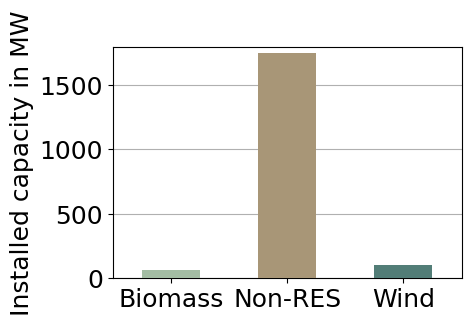

In [110]:
bus = ori

ori_cap.plot.bar(figsize=(4.5,3),color=[green3,  beige2,  teal3], zorder = 2)
#bus_3.plot.bar(figsize=(5,3),color=[beige3, teal3, purple2,yellow, teal2])
plt.xticks(rotation = 0, ticks = [0,1,2], labels = ['Biomass','Non-RES','Wind'])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,1800)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)

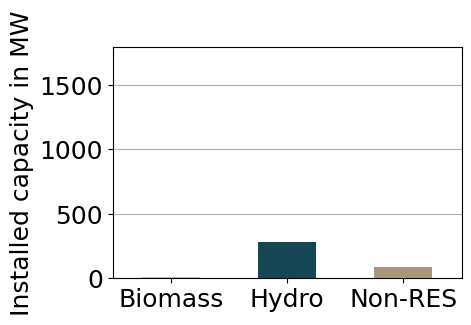

In [111]:
bus = nor

nor_cap.plot.bar(figsize=(4.5,3),color=[green3,  teal2,  beige2], zorder = 2)
plt.xticks(rotation = 0, ticks = [0,1,2], labels = ['Biomass','Hydro','Non-RES'])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,1800)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)

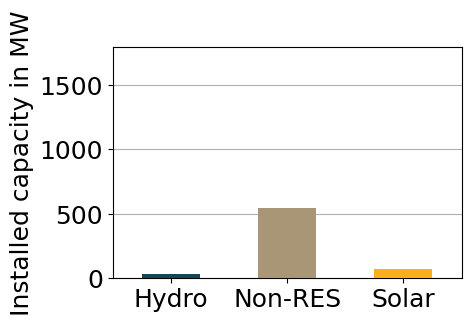

In [112]:
bus = sou

sou_cap.plot.bar(figsize=(4.5,3),color=[teal2,  beige2,yellow], zorder = 2)
plt.xticks(rotation = 0, ticks = [0,1,2], labels = ['Hydro','Non-RES','Solar'])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,1800)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)

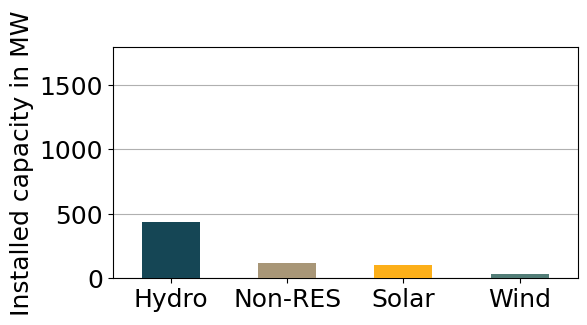

In [113]:
bus = cen

cen_cap.plot.bar(figsize=(6,3),color=[teal2,  beige2,yellow,teal3], zorder = 3)
plt.xticks(rotation = 0, ticks = [0,1,2,3], labels = ['Hydro','Non-RES','Solar','Wind'])
plt.xlabel('')
plt.ylabel('Installed capacity in MW')
plt.ylim(0,1800)
plt.grid(axis='y',zorder=0)
plt.savefig(val_path+f'capacity_{bus}.png', dpi=300, bbox_inches='tight', transparent=True)

# Demand

## Demand time series

In [67]:
# Settings
year = 2030
weather = 2013

color = [purple2]

# Read in data
data_path = f"C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/data/ssp2-2.6/{year}/era5_{weather}/SouthAmerica.csv"
df_demand = pd.read_csv(data_path,delimiter=';')

#display(df_demand)
demand_BO = df_demand[df_demand['region_code'] == 'BO']['Electricity demand']/1.19915 #/1.195 scale factor for the 2030 data for 2021
total_demand = demand_BO.sum()/1000000 # in TWh
print(f'The total demand in {year} in Bolivia is {round(total_demand,3)} TWh.')

# Plots
# demand_BO.iloc[:745].plot(color=color, figsize = (8,4))
# plt.ylabel('Hourly load in MWh')
# plt.title(f'Load pattern in January {year} in Bolivia')
# plt.show()
# demand_BO.iloc[:169].plot(color=color, figsize = (8,4))
# plt.ylabel('Hourly load in MWh')
# plt.title(f'Load pattern in the first week of January {year} in Bolivia')

t_70 = 1043
t_80 = 1192
t_90 = 1341
demand_BO.max()

count_above_threshold = (demand_BO > t_90).sum()
count_above_threshold

The total demand in 2030 in Bolivia is 9.455 TWh.


205

## Demand over the year

Text(0, 0.5, 'Monthly demand in GWh')

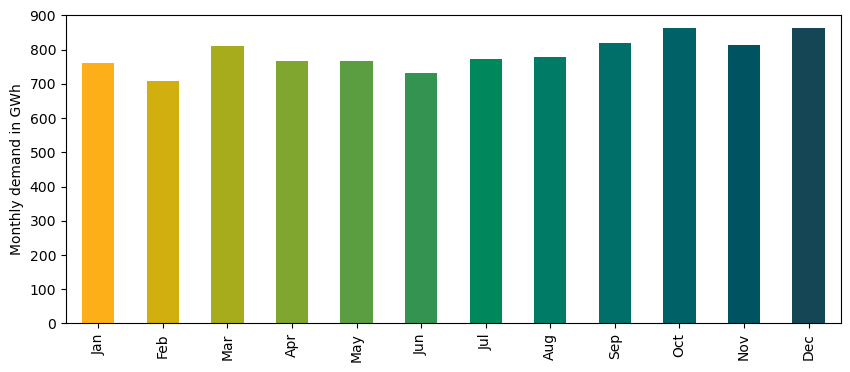

In [26]:

import calendar

colors = ['#fcaf19',
'#d1af0e',
'#a7ac1d',
'#80a630',
'#5b9e41',
'#359351',
'#00885d',
'#007b65',
'#006e69',
'#006167',
'#005360',
'#154655']
demand_2021 = pd.read_excel(data_path + 'demand_2021.xlsx')
demand_2021.real[0:12].plot.bar(figsize = (10,4), color = colors)
months = np.arange(0, 12)
plt.xticks(months, calendar.month_abbr[1:])
plt.ylim(0,900)
plt.ylabel('Monthly demand in GWh')

In [5]:
# Demand over the years

start_value = 11388
end_value = 14655

# Generate 8 linearly spaced values between the start and end
values = np.linspace(start_value, end_value, 10)
values

array([11388., 11751., 12114., 12477., 12840., 13203., 13566., 13929.,
       14292., 14655.])

## Demand per node

In [83]:
solved_network = 'C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/Validation_results/Validation_2021_case_1_a.nc'
#reference_network = 'C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/Zero_emissions/no_exp_2021.nc'
print(solved_network)
n_solve = pypsa.Network(solved_network)
n = n_solve
n.buses

C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/Validation_results/Validation_2021_case_1_a.nc


INFO:pypsa.io:Imported network Validation_2021_case_1_a.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


,v_nom,country,x,y,control,generator,type,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
BO 0,220.0,BO,-63.727550,-17.444333,Slack,BO 0 OCGT,,AC,None,1.0,0.0,inf,
BO 1,220.0,BO,-67.886833,-16.246122,PQ,,,AC,None,1.0,0.0,inf,
BO 2,220.0,BO,-65.478983,-19.670683,PQ,,,AC,None,1.0,0.0,inf,
BO 3,220.0,BO,-66.149025,-17.547787,PQ,,,AC,None,1.0,0.0,inf,


Load
BO 0    2.204674e+06
BO 1    2.929578e+06
BO 2    2.365512e+06
BO 3    1.955311e+06
dtype: float64

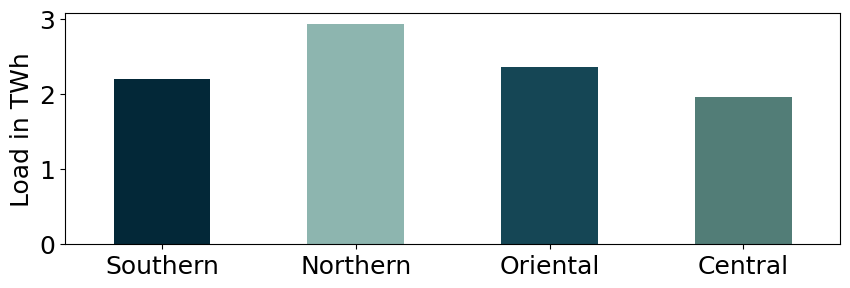

In [86]:
(n.loads_t.p.sum()/1000000).plot.bar(figsize = (10,3), color = zone_colors)
plt.xticks(ticks = [0,1,2,3], labels = ['Southern', 'Northern','Oriental','Central'] ,rotation = 0)
plt.ylabel('Load in TWh')
plt.xlabel('')
plt.savefig(save_path+'nodal_load.pdf', dpi=300, format='pdf',bbox_inches='tight')

n.loads_t.p.sum()


## Demand projection


In [28]:
demand_projection = pd.read_excel(data_path + 'demand_scaling_factors.xlsx')
#demand_projection = demand_projection.loc['total demand [GWh]','Demand CNDC']
demand_projection

,Year,total demand [GWh],scaling factor,Demand CNDC,Unnamed: 4
0,2021,9455,0.833921,9455,0.833921
1,2022,9670,0.852884,9829,0.866908
2,2023,9885,0.871847,10197,0.899365
3,2024,10099,0.890721,10504,0.926442
4,2025,10314,0.909684,10812,0.953607
5,2026,10529,0.928647,11373,1.003087
6,2027,10744,0.947610,11879,1.047716
7,2028,10958,0.966484,12407,1.094285
8,2029,11173,0.985447,12959,1.142971
9,2030,11338,1.000000,13535,1.193773


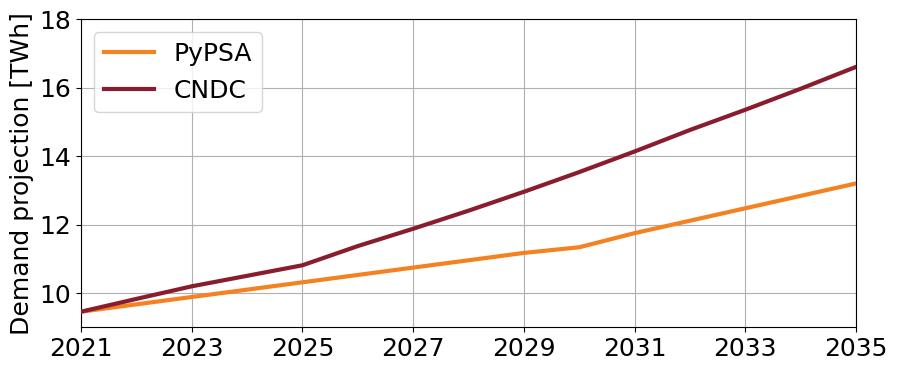

In [36]:


(demand_projection['total demand [GWh]']/1000).plot(color=orange, linewidth = 3, figsize=(10,3.5), label = 'PyPSA', zorder = 3)
(demand_projection['Demand CNDC']/1000).plot(color=red1, linewidth = 3, figsize=(10,4), label = "CNDC", zorder = 3)

plt.legend()
plt.ylabel("Demand projection [TWh]")
plt.ylim(9,18)
plt.xlim(0,14)
plt.grid(zorder = 0)
years = np.arange(2021, 2036)
plt.xticks(ticks = np.arange(0,15)[::2], labels = years[::2])
# target_years = [2025, 2030, 2035]

# # Iterate over the target years and add text annotations
# for year in target_years:
#     value = demand_projection[years == year]  # Get the corresponding value
#     plt.text(year, value, f'{value:.2f}', ha='center', va='bottom')
plt.savefig(save_path+'demand_projection.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()

INFO:pypsa.io:Imported network elec_s_4.nc has buses, carriers, generators, lines, loads, storage_units
c:\Users\xenia\miniconda3\envs\pypsa-earth-v2\lib\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


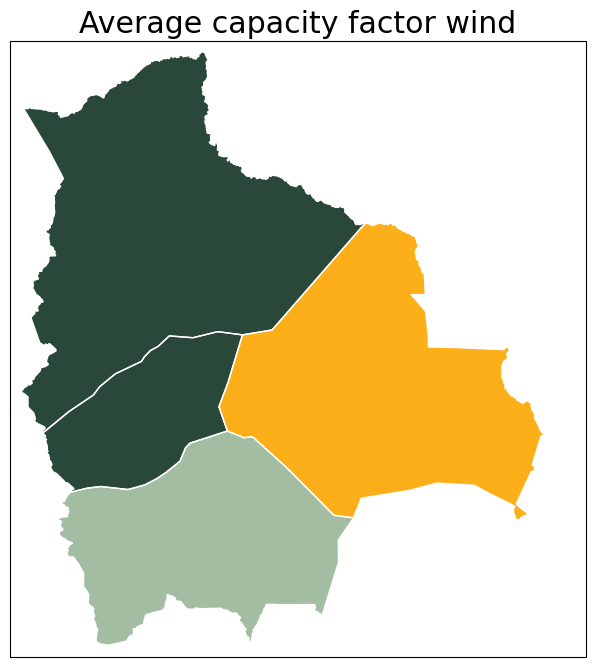

In [16]:
import cartopy.crs as ccrs
import geopandas as gpd
plot_capfacs = (
    "onwind"  # colors in the back represent capacity factors for this technology
)
home = 'C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/'

fig, ax1 = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()},figsize = (8,8))
 

n = pypsa.Network(home + f"networks/elec_s_4.nc")
r = gpd.read_file(home + 
    f"resources/bus_regions/regions_onshore_elec_s_4.geojson"
).set_index("name")

factor = n.generators_t.p_max_pu.filter(like=plot_capfacs).mean()
factor.index = [idx.split(f" {plot_capfacs}")[0] for idx in factor.index]
r["factor"] = factor

# n.plot(ax=ax1,
#     color_geomap=False,
#     bus_colors=beige3,
#     bus_sizes=0.03,
#     line_colors=beige2,
#     line_widths=1.5
# )

# 4 clusters network boundaries
ax1.set_xlim(left=min(n.buses.x)-2.0, right=max(n.buses.x)+7.2)
ax1.set_ylim(bottom=min(n.buses.y)-3.5, top=max(n.buses.y)+6.8)

# Simplified network boundaries
#ax1.set_xlim(left=min(n.buses.x)-2, right=max(n.buses.x)+6.2)
#ax1.set_ylim(bottom=min(n.buses.y)-2.0, top=max(n.buses.y)+5.3)

# Base network boundaries
#ax1.set_xlim(left=min(n.buses.x)-1.7, right=max(n.buses.x)+5.2)
#ax1.set_ylim(bottom=min(n.buses.y)-1.0, top=max(n.buses.y)+4.8)

r.boundary.plot(ax=ax1, color='white', linewidth=1, alpha=1) # four zones



r.plot(ax=ax1, column="factor",color=[green3,green1,yellow,green1],alpha=1, vmin=0, vmax=1) # four zones colored #  color=zone_colors

import matplotlib.patches as mpatches

northern = mpatches.Patch(color=teal1, label ='Northern')
central = mpatches.Patch(color=teal2, label ='Central')
southern = mpatches.Patch(color=teal3, label ='Southern')
oriental = mpatches.Patch(color=teal4, label ='Oriental')

handles=[northern,central,southern,oriental]
ax1.set_title('Average capacity factor wind')
#ax1.legend(handles=handles, loc="center right", bbox_to_anchor=(1.3, 0.8), frameon = False)
plt.savefig(save_path+'wind_avg_cp.png', dpi=300, format='png', bbox_inches='tight')

INFO:pypsa.io:Imported network elec_s_4.nc has buses, carriers, generators, lines, loads, storage_units
c:\Users\xenia\miniconda3\envs\pypsa-earth-v2\lib\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


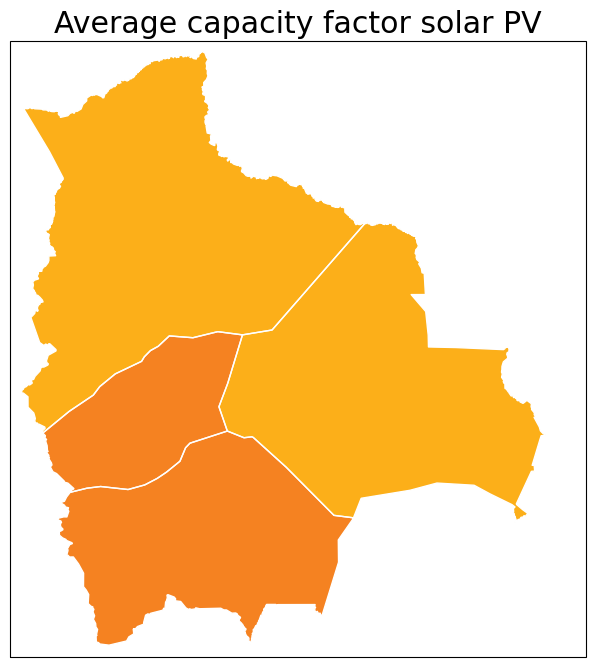

In [18]:
import cartopy.crs as ccrs
import geopandas as gpd
plot_capfacs = (
    "onwind"  # colors in the back represent capacity factors for this technology
)
home = 'C:/Users/xenia/Desktop/Thesis_Code/Code/pypsa-earth_working/pypsa-earth/'

fig, ax1 = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()},figsize = (8,8))
 

n = pypsa.Network(home + f"networks/elec_s_4.nc")
r = gpd.read_file(home + 
    f"resources/bus_regions/regions_onshore_elec_s_4.geojson"
).set_index("name")

factor = n.generators_t.p_max_pu.filter(like=plot_capfacs).mean()
factor.index = [idx.split(f" {plot_capfacs}")[0] for idx in factor.index]
r["factor"] = factor

# n.plot(ax=ax1,
#     color_geomap=False,
#     bus_colors=beige3,
#     bus_sizes=0.03,
#     line_colors=beige2,
#     line_widths=1.5
# )

# 4 clusters network boundaries
ax1.set_xlim(left=min(n.buses.x)-2.0, right=max(n.buses.x)+7.2)
ax1.set_ylim(bottom=min(n.buses.y)-3.5, top=max(n.buses.y)+6.8)

# Simplified network boundaries
#ax1.set_xlim(left=min(n.buses.x)-2, right=max(n.buses.x)+6.2)
#ax1.set_ylim(bottom=min(n.buses.y)-2.0, top=max(n.buses.y)+5.3)

# Base network boundaries
#ax1.set_xlim(left=min(n.buses.x)-1.7, right=max(n.buses.x)+5.2)
#ax1.set_ylim(bottom=min(n.buses.y)-1.0, top=max(n.buses.y)+4.8)

r.boundary.plot(ax=ax1, color='white', linewidth=1, alpha=1) # four zones



r.plot(ax=ax1, column="factor",color=[orange,yellow,yellow,orange],alpha=1, vmin=0, vmax=1) # four zones colored #  color=zone_colors



import matplotlib.patches as mpatches

northern = mpatches.Patch(color=teal1, label ='Northern')
central = mpatches.Patch(color=teal2, label ='Central')
southern = mpatches.Patch(color=teal3, label ='Southern')
oriental = mpatches.Patch(color=teal4, label ='Oriental')

handles=[northern,central,southern,oriental]
ax1.set_title('Average capacity factor solar PV')
#ax1.legend(handles=handles, loc="center right", bbox_to_anchor=(1.3, 0.8), frameon = False)
plt.savefig(save_path+'solar_avg_cp.png', dpi=300, format='png', bbox_inches='tight')

## Decomissioning

In [8]:
df = pd.read_csv("C:/Users/xenia/Desktop/Bolivia/" + 'Decomission.csv',delimiter=';')

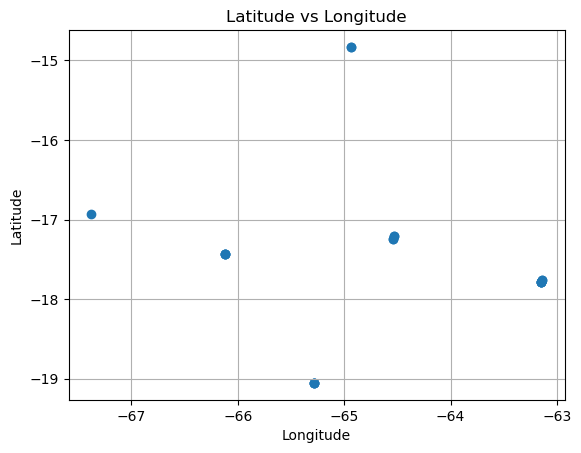

In [9]:
# Scatter plot
plt.scatter(df['lon'], df['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude')
plt.grid(True)
plt.show()

INFO:pypsa.io:Imported network elec_s_4.nc has buses, carriers, generators, lines, loads, storage_units
c:\Users\xenia\miniconda3\envs\pypsa-earth-v2\lib\site-packages\geopandas\plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


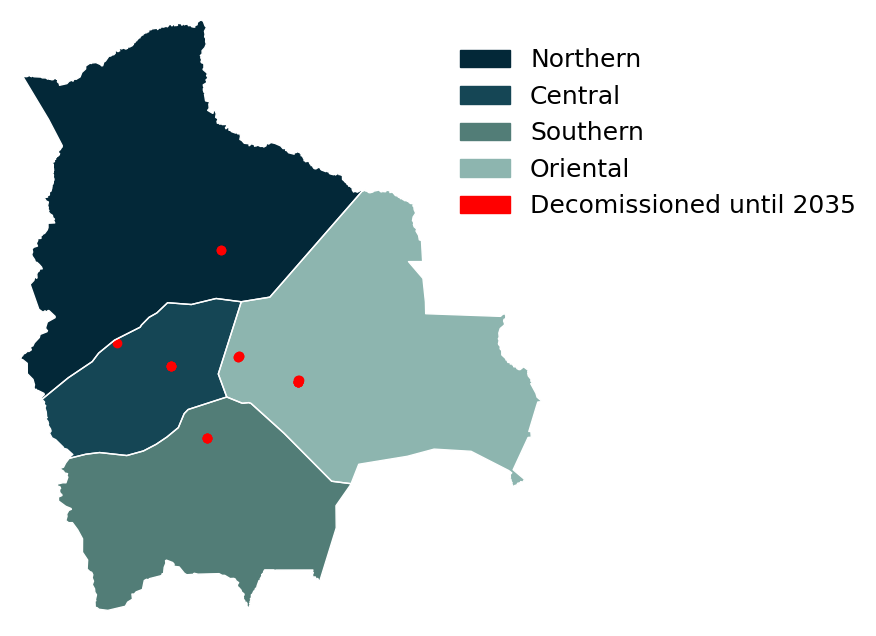

In [17]:
import cartopy.crs as ccrs
import geopandas as gpd
plot_capfacs = (
    "onwind"  # colors in the back represent capacity factors for this technology
)
home = 'C:/Users/xenia/Desktop/Bolivia/pypsa-earth/'

fig, ax1 = plt.subplots(subplot_kw={"projection":ccrs.PlateCarree()},figsize = (8,8))
 

n = pypsa.Network(home + f"networks/elec_s_4.nc")
r = gpd.read_file(home + 
    f"resources/bus_regions/regions_onshore_elec_s_4.geojson"
).set_index("name")

factor = n.generators_t.p_max_pu.filter(like=plot_capfacs).mean()
factor.index = [idx.split(f" {plot_capfacs}")[0] for idx in factor.index]
r["factor"] = factor

# n.plot(ax=ax1,
#     color_geomap=False,
#     bus_colors=beige3,
#     bus_sizes=0.03,
#     line_colors=beige2,
#     line_widths=1.5
# )

# 4 clusters network boundaries
ax1.set_xlim(left=min(n.buses.x)-2.0, right=max(n.buses.x)+7.2)
ax1.set_ylim(bottom=min(n.buses.y)-3.5, top=max(n.buses.y)+6.8)

# Simplified network boundaries
#ax1.set_xlim(left=min(n.buses.x)-2, right=max(n.buses.x)+6.2)
#ax1.set_ylim(bottom=min(n.buses.y)-2.0, top=max(n.buses.y)+5.3)

# Base network boundaries
#ax1.set_xlim(left=min(n.buses.x)-1.7, right=max(n.buses.x)+5.2)
#ax1.set_ylim(bottom=min(n.buses.y)-1.0, top=max(n.buses.y)+4.8)

r.boundary.plot(ax=ax1, color='white', linewidth=1, alpha=1) # four zones



r.plot(ax=ax1, column="factor",color=[teal3, teal4, teal2, teal1],alpha=1, vmin=0, vmax=1) # four zones colored #  color=zone_colors

ax1.scatter(df['lon'], df['lat'], color='red', marker='o', label='Decomissioned until 2035')

circle_patch = mpatches.Circle((0.5, 0.5), 0.1, edgecolor='red', facecolor='red', label='Decomissioned until 2035')

import matplotlib.patches as mpatches

northern = mpatches.Patch(color=teal1, label ='Northern')
central = mpatches.Patch(color=teal2, label ='Central')
southern = mpatches.Patch(color=teal3, label ='Southern')
oriental = mpatches.Patch(color=teal4, label ='Oriental')

handles=[northern,central,southern,oriental,circle_patch]
#ax1.set_title('Powerplants that will be decomissioned until 2035')

# Remove the frame around the map
ax1.spines['geo'].set_visible(False)
ax1.legend(handles=handles, loc="center right", bbox_to_anchor=(1.5, 0.8), frameon = False,handlelength=2)
plt.savefig(save_path+'decom.pdf', dpi=300, format='pdf', bbox_inches='tight')